<a href="https://colab.research.google.com/github/IndraMadika/ML_Study/blob/main/Image%20Classification/Until%20Test%20Prediction%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d indragenn/fruit-dataset-for-classification

100% 113M/113M [00:01<00:00, 103MB/s]  
100% 113M/113M [00:01<00:00, 84.4MB/s]


In [4]:
import zipfile
local_dataset_zip = '/content/fruit-dataset-for-classification.zip'
zip_buka = zipfile.ZipFile(local_dataset_zip, 'r')
zip_buka.extractall('/content')
zip_buka.close()


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [15]:
TRAIN_PATH = '/content/Dataset/Train'
TEST_PATH = '/content/Dataset/Test'
SIZE = (150, 150)

In [16]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['Rotten Guava', 'Rotten_Strawberry', 'Rotten_Lemon', 'Rotten_Lime', 'Rotten_Mango', 'Fresh_Lemon', 'Fresh_Lime', 'Fresh_Strawberry', 'Fresh_Mango', 'Fresh_Guava']


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255) 

'''
Comments:
- ImageDataGenerator will resize all images to target_size
- x_col is the column where the images' names are
- y_col is the column where the labels are
- has_ext means that the images' names include a file extension, e.g. image_name.jpg
- Here you can change the targe_size to resize all images to different shapes.
Maybe larger images help in getting a better accuracy
'''
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                 classes=labels,
                                                 target_size=SIZE, 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                 classes=labels,
                                                 target_size=SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 8516 images belonging to 10 classes.
Found 944 images belonging to 10 classes.


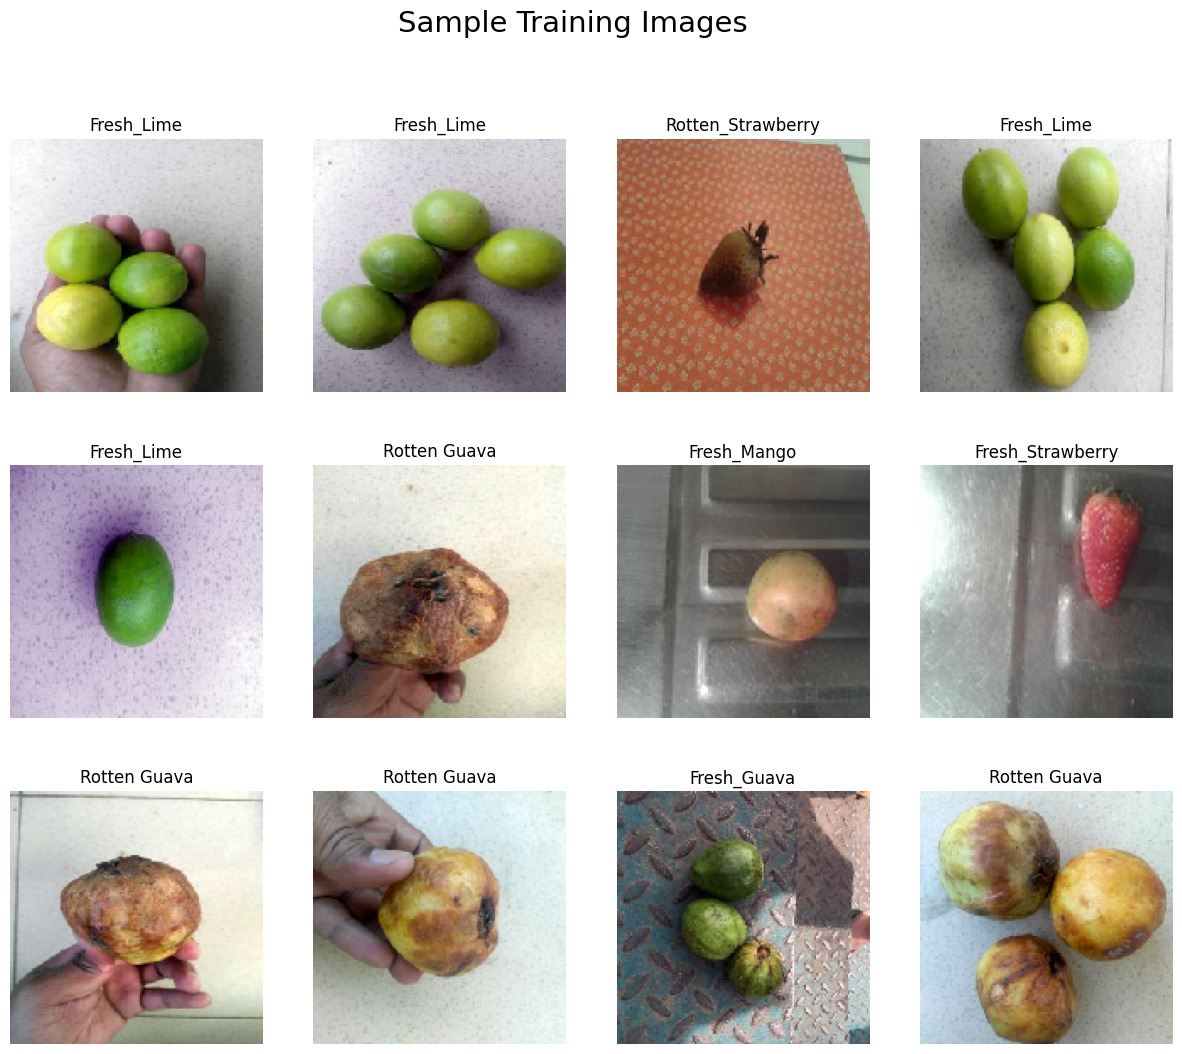

In [18]:

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Inisialisasi model
model = Sequential()

# Tambahkan layer konvolusi
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer konvolusi dan max pooling tambahan
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer flatten untuk mengubah output menjadi vektor 1D
model.add(Flatten())

# Tambahkan layer fully connected dengan 256 unit
model.add(Dense(32, activation='relu'))

# Tambahkan layer dropout untuk menghindari overfitting
model.add(Dropout(0.5))

# Tambahkan layer output dengan jumlah kelas sesuai dengan dataset
model.add(Dense(len(labels), activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=3)


Epoch 1/3
267/267 [==============================] - 358s 1s/step - loss: 1.6099 - accuracy: 0.4051 - val_loss: 2.3531 - val_accuracy: 0.4640
Epoch 2/3
267/267 [==============================] - 345s 1s/step - loss: 0.9798 - accuracy: 0.6303 - val_loss: 2.0405 - val_accuracy: 0.5233
Epoch 3/3
267/267 [==============================] - 347s 1s/step - loss: 0.7523 - accuracy: 0.7114 - val_loss: 2.6818 - val_accuracy: 0.6419


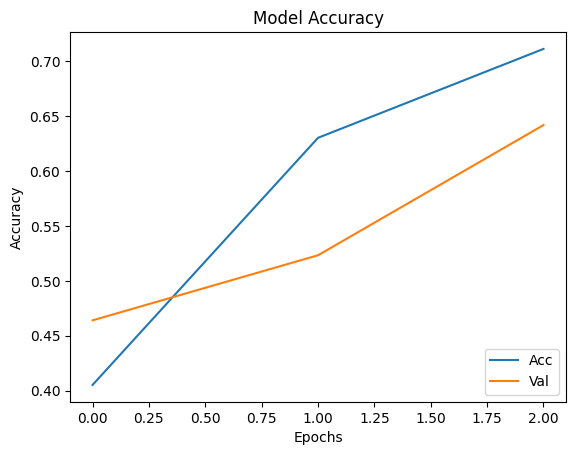

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

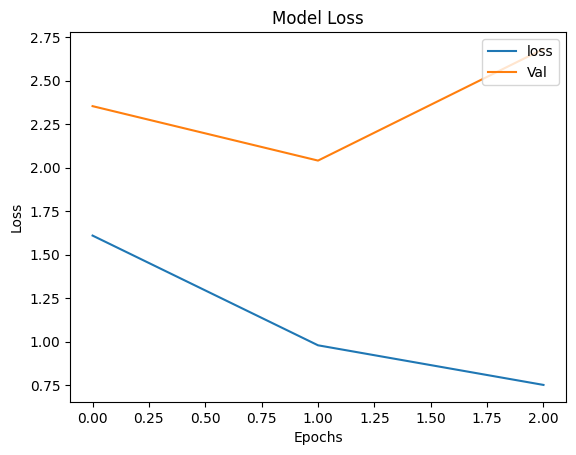

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 1000 images belonging to 10 classes.
1000/1000 [==============================] - 17s 17ms/step - loss: 0.3973 - accuracy: 0.8870
accuracy test:  0.8870000243186951
loss test:  0.397278755903244


In [25]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]    
    prob=p[index]
#     print('for file ', files[i], ' predicted class is ', klass,' with probability ',prob)

1000/1000 [==============================] - 18s 18ms/step


In [26]:
print(len(test_generator[0][0]))
print(test_generator[0][1].shape)

1
(1, 10)


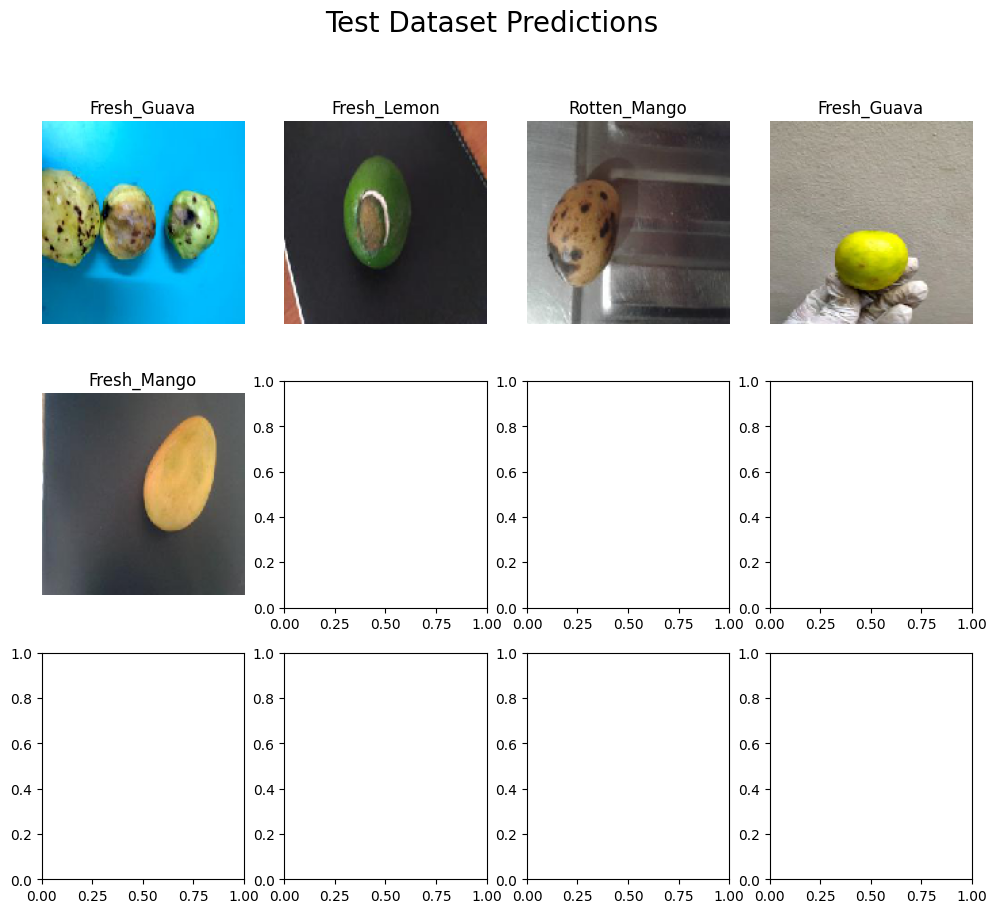

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        if idx >= len(predictions):
            break
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[idx][0].reshape(150,150,3))
        ax[i, j].axis("off")
        idx += 200

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()
